# First Part

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [56]:
df = pd.read_csv('data/univariate_linear_regression_dataset.csv', header=None)

In [57]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


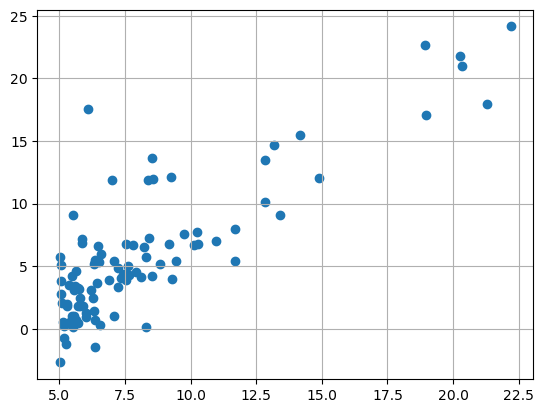

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [58]:
X = df.iloc[:,0]
Y= df.iloc[:,1]
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()
df.head()

In [59]:
sl = stats.linregress(X,Y)
slope = sl.slope
intercept = sl.intercept
coef_correlation = sl.rvalue


In [60]:
def predict(x):
    return slope*x + intercept

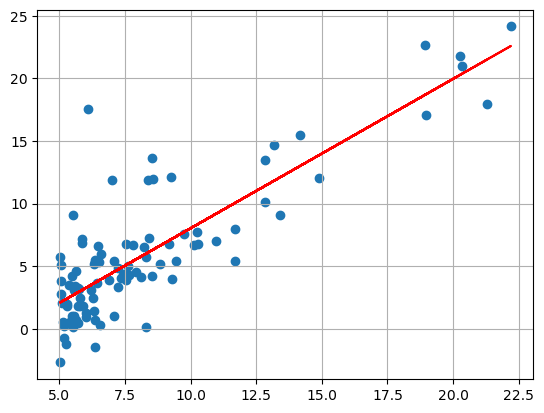

In [61]:
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, color='red')
plt.show()

### 1. Analyse du programme
- Dataset :Le programme utilise un fichier CSV `univariate_linear_regression_dataset.csv` contenant deux colonnes — une variable indépendante (X) et une variable dépendante (Y). Il s'agit d'un dataset univarié, c'est-à-dire avec une seule variable d'entrée.

- Input (X) : La première colonne du dataframe (`iloc[:,0]`), représentant la variable explicative.

- Output (Y) : La deuxième colonne (`iloc[:,1]`), représentant la variable cible à prédire.

- Technique utilisée : La régression linéaire simple (univariée), appliquée via scipy.stats.linregress. Le modèle cherche la droite de la forme Y = slope·X + intercept qui minimise l'erreur entre les valeurs réelles et prédites. Le résultat est visualisé avec matplotlib : d'abord un nuage de points, puis le même nuage avec la droite de régression tracée en rouge.

### 2. Étapes d'une application Machine Learning
Le programme tel qu'écrit est simplifié, voici les étapes complètes qu'il devrait idéalement suivre :
- Collecte & préparation des données → Charger et nettoyer le CSV (gestion des valeurs manquantes, normalisation si nécessaire).

- Séparation Train / Test → Diviser le dataset en deux parties, typiquement 80% pour l'entraînement (training data) et 20% pour les tests (testing data). En pratique cela se fait avec train_test_split de sklearn. Le programme actuel ne fait pas cette séparation — il entraîne et prédit sur les mêmes données, ce qui est une limitation.

- Entraînement (Training) → Appliquer linregress sur les données d'entraînement pour calculer slope et intercept.

- Test & Évaluation → Utiliser la fonction predict() sur les données de test et mesurer l'erreur (ex. MSE, R²) pour évaluer la qualité du modèle.

- Prédiction → Utiliser le modèle entraîné pour prédire de nouvelles valeurs inconnues (ex. predict(22.5)).

### 3. Rôle de iloc
`iloc` (pour integer location) est un accesseur Pandas qui permet de sélectionner des données par` position entière (index numérique), indépendamment des noms de colonnes.

In [62]:
print("slope: ", slope)
print("intercept: ", intercept)
print("coefficient of correlation: ", coef_correlation)

slope:  1.1930336441895941
intercept:  -3.8957808783118555
coefficient of correlation:  0.837873232526341


In [63]:
print(predict(22.5))

22.94747611595401


# Second Part

In [64]:
df = pd.read_csv('data/univariate_linear_regression_dataset.csv',header=None)
x = df.iloc[:,0]
n_samples = len(x)
x=np.array(x).reshape(n_samples,1)
y = df.iloc[:,1]
y = np.array(y).reshape(n_samples,1)

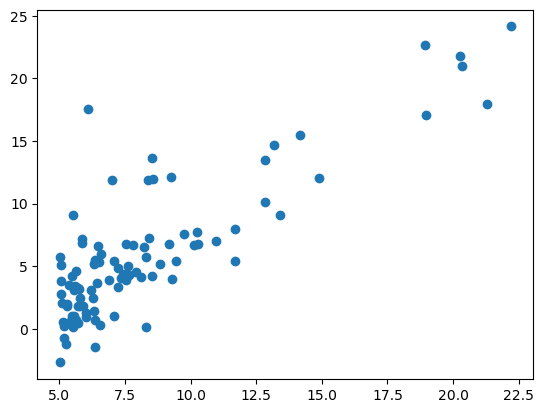

In [65]:
plt.scatter(x,y)
plt.show()

In [66]:
X = np.hstack((x,np.ones((x.shape))))
theta = np.random.randn(2,1)
print(theta)

[[2.54344733]
 [0.69840969]]


In [67]:
def f(X,theta):
    return X.dot(theta)

def erreur_somme_des_distances(X,y,theta):
    m = len(y)
    return (1/(2*m))*np.sum((f(X,theta)-y)**2)
def gradient(X,y,theta):
    m = len(y)
    return (1/m)*X.T.dot(f(X,theta)-y)
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    historique_des_erreurs = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate*gradient(X,y,theta)
        historique_des_erreurs[i] = erreur_somme_des_distances(X,y,theta)
    return theta, historique_des_erreurs

In [68]:
n_iterations = 1000
learning_rate = 0.01
theta, historique_des_erreurs = gradient_descent(X,y,theta,learning_rate,n_iterations)
predictions = f(X,theta)
print("theta: ", theta)

theta:  [[ 1.12004366]
 [-3.16922932]]


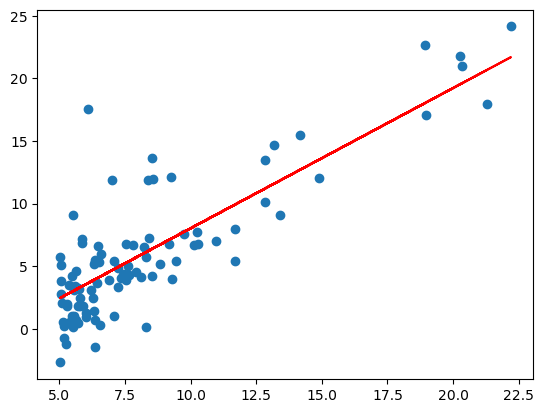

[[22.03175302]]


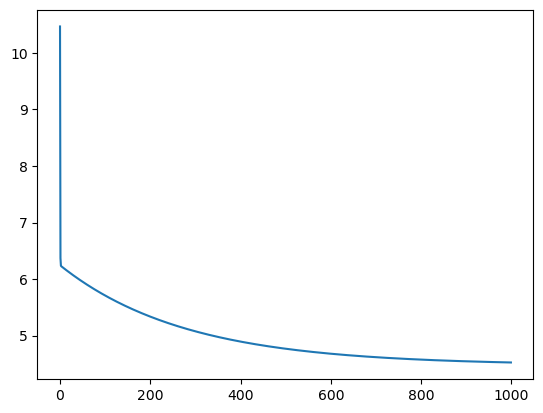

In [69]:
plt.scatter(x,y)
plt.plot(x,predictions,color='red')
plt.show()
plt.figure()
plt.plot(range(n_iterations),historique_des_erreurs)
print(f(np.array([[22.5,1]]),theta))


### Rôle de `n_iterations`et `learning_rate`:

- `n_iterations` définit combien de fois l'algorithme de descente de gradient va mettre à jour le vecteur `theta`. À chaque itération, le modèle ajuste ses paramètres pour réduire l'erreur.

- `learning_rate` contrôle la taille du pas que fait le modèle à chaque itération lors de la mise à jour de `theta`.

In [70]:
def afficher_pol(LPol):
    l = LPol[:]
    l.reverse()
    l=[round(e,2) for e in l]
    for i in range(len(l)):
        print('('+str(l[i])+'*X^'+str(i)+')',end='+')
def Evaluer_pol(LPol,x):
    res = 0
    for i in range(len(LPol)):
        res += LPol[i]*(x**i)
    return res


In [72]:
data = pd.read_csv('data/dataset_polynomial3.csv').values

(-7.38*X^0)+(13.53*X^1)+(-7.38*X^2)+(1.23*X^3)+

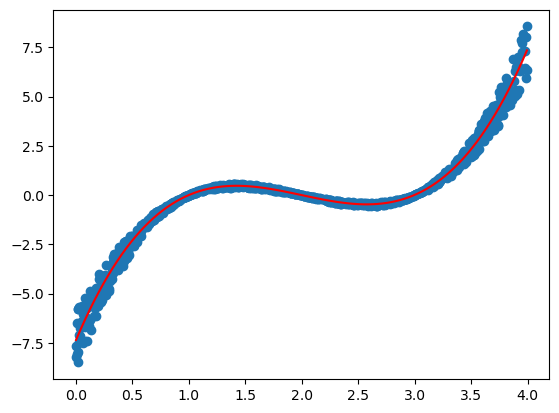

In [76]:
x=data[1:1001,0]
y=data[1:1001,1]
degre_polynome=3
p = np.poly1d(np.polyfit(x,y,degre_polynome))
LPol=list(p)
afficher_pol(LPol)
les_x = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(les_x,p(les_x),color='red')
plt.show()

### Question 2 : Rôle des fonctions afficher_pol et evaluer_pol
`afficher_pol(LPol)` :

Cette fonction sert à afficher lisiblement le polynôme sous forme mathématique. Elle prend en entrée LPol, une liste des coefficients du polynôme dans l'ordre de np.poly1d (du degré le plus élevé au plus bas), et l'affiche terme par terme.
Elle fait trois choses :

- Inverse la liste (L.reverse()) pour partir du degré 0 vers le degré le plus élevé

- Arrondit les coefficients à 2 décimales pour une meilleure lisibilité

- Affiche chaque terme sous la forme (coeff * X^i) en les séparant par des +

`evaluer_pol(LPol, x)` : 

Cette fonction calcule et retourne la valeur numérique du polynôme en un point x donné, c'est-à-dire elle effectue le calcul P(x). Elle prend la liste des coefficients et une valeur x, puis calcule la somme :

P(x) = L[0]·x⁰ + L[1]·x¹ + L[2]·x² + ...

Elle est utile pour faire des prédictions : si on veut estimer la valeur de y pour un x donné, on appelle Evaluer_pol(LPol, x) sans avoir besoin de reconstruire l'objet poly1d.